In [1]:
import numpy as np
import pandas as pd

import sklearn
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_curve, auc
%matplotlib inline
matplotlib.rcParams.update({'font.size': 20})


In [2]:
df = pd.read_csv('data/transformed_features.csv')

In [3]:
features = ['lifetime',
            'active_days',
            'max_daily_trans',
            'gini_in_btc',
            'mean_in_btc',
            'std_in_btc',
            'gini_out_btc',
            'mean_out_btc',
            'std_out_btc',
            'total_in_btc',
            'total_out_btc',
            'num_incoming',
            'num_outgoing',
            'in_out_ratio',
            'uniq_in_addresses',
            'uniq_out_addresses',
            'uniq_addresses',
            'min_delay',
            'max_delay',
            'mean_delay',
            'median_delay',
            'max_balance_diff']

In [4]:
df.head()

,lifetime,active_days,max_daily_trans,gini_in_btc,mean_in_btc,std_in_btc,gini_out_btc,mean_out_btc,std_out_btc,total_in_btc,...,in_out_ratio,uniq_in_addresses,uniq_out_addresses,uniq_addresses,min_delay,max_delay,mean_delay,median_delay,max_balance_diff,is_ponzi
0,14.533886,2.772589,1.791759,0.305790,0.203559,0.190889,0.000000,0.095310,0.000000,2.134166,...,3.526361,3.526361,0.693147,3.555348,5.111988,5.111988,5.111988,5.111988,0.862890,0
1,18.158071,4.477337,1.609438,0.388943,1.010827,0.981611,0.485269,1.801107,2.153562,4.959887,...,1.333185,4.406719,3.401197,4.709530,8.000349,13.865214,11.687910,10.288512,4.208863,0
2,19.001901,4.787492,2.197225,0.590322,0.151075,0.318234,0.468026,1.102187,1.188039,3.461876,...,3.703768,5.293305,1.791759,5.318120,9.059052,18.327569,17.634516,17.634516,1.947590,0
3,13.747491,2.397895,2.197225,0.128018,1.487234,0.648567,0.272252,3.315730,2.779797,4.674416,...,2.169054,3.465736,1.609438,3.583519,7.849324,11.716152,10.567901,9.628030,4.429864,0
4,13.467727,2.197225,2.639057,0.566881,3.067064,3.884234,0.564961,3.436243,4.181044,5.804442,...,0.826679,2.944439,2.564949,3.433987,6.473891,12.464927,10.637579,8.063693,5.444666,0


In [5]:
X = df[features]
y = df['is_ponzi']
X.head()

,lifetime,active_days,max_daily_trans,gini_in_btc,mean_in_btc,std_in_btc,gini_out_btc,mean_out_btc,std_out_btc,total_in_btc,...,num_outgoing,in_out_ratio,uniq_in_addresses,uniq_out_addresses,uniq_addresses,min_delay,max_delay,mean_delay,median_delay,max_balance_diff
0,14.533886,2.772589,1.791759,0.305790,0.203559,0.190889,0.000000,0.095310,0.000000,2.134166,...,0.693147,3.526361,3.526361,0.693147,3.555348,5.111988,5.111988,5.111988,5.111988,0.862890
1,18.158071,4.477337,1.609438,0.388943,1.010827,0.981611,0.485269,1.801107,2.153562,4.959887,...,3.401197,1.333185,4.406719,3.401197,4.709530,8.000349,13.865214,11.687910,10.288512,4.208863
2,19.001901,4.787492,2.197225,0.590322,0.151075,0.318234,0.468026,1.102187,1.188039,3.461876,...,1.791759,3.703768,5.293305,1.791759,5.318120,9.059052,18.327569,17.634516,17.634516,1.947590
3,13.747491,2.397895,2.197225,0.128018,1.487234,0.648567,0.272252,3.315730,2.779797,4.674416,...,1.609438,2.169054,3.465736,1.609438,3.583519,7.849324,11.716152,10.567901,9.628030,4.429864
4,13.467727,2.197225,2.639057,0.566881,3.067064,3.884234,0.564961,3.436243,4.181044,5.804442,...,2.708050,0.826679,2.944439,2.564949,3.433987,6.473891,12.464927,10.637579,8.063693,5.444666


In [6]:
# from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
X[features] = scalar.fit_transform(X)

X.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3498: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.loc._setitem_with_indexer((slice(None), indexer), value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3469: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guid

,lifetime,active_days,max_daily_trans,gini_in_btc,mean_in_btc,std_in_btc,gini_out_btc,mean_out_btc,std_out_btc,total_in_btc,...,num_outgoing,in_out_ratio,uniq_in_addresses,uniq_out_addresses,uniq_addresses,min_delay,max_delay,mean_delay,median_delay,max_balance_diff
0,-1.359301,-0.945874,-0.203009,-0.182363,-0.715060,-0.645463,-2.552530,-1.203549,-1.183948,-0.925822,...,-1.765148,0.329043,-0.278382,-1.763887,-0.676573,-0.924446,-2.666227,-2.319772,-1.870323,-1.033188
1,0.742541,0.970535,-0.411001,0.332173,0.048865,0.036886,0.692742,0.060257,0.316144,0.567138,...,0.658787,-0.238964,0.636841,0.747580,0.636232,-0.079247,-0.014291,-0.237904,-0.200834,0.819711
2,1.231919,1.319198,0.259546,1.578273,-0.764726,-0.535571,0.577428,-0.457565,-0.356404,-0.224331,...,-0.781797,0.374990,1.558539,-0.745025,1.328462,0.230554,1.337654,1.644728,2.168337,-0.432514
3,-1.815370,-1.367089,0.259546,-1.282390,0.499693,-0.250513,-0.731823,1.182426,0.752356,0.416310,...,-0.944990,-0.022484,-0.341408,-0.914112,-0.644530,-0.123440,-0.665385,-0.592487,-0.413847,0.942094
4,-1.977619,-1.592674,0.763589,1.433227,1.994700,2.541687,1.225692,1.271712,1.728413,1.013355,...,0.038361,-0.370143,-0.883350,-0.027963,-0.814613,-0.525923,-0.438531,-0.570428,-0.918364,1.504061


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state = 101)

In [8]:
from sklearn.linear_model import LogisticRegression


model = LogisticRegression()

In [9]:
# https://stackoverflow.com/questions/19233771/sklearn-plot-confusion-matrix-with-labels/48018785
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap='jet',
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))

In [10]:
from sklearn.metrics import recall_score, precision_score, average_precision_score,\
                            precision_recall_curve, classification_report, confusion_matrix
def classify(model, name):   

    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    

    y_score = model.decision_function(X_test)
    cm = confusion_matrix(y_test,y_pred)
    print(cm)
    
    recall = recall_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    AUC = average_precision_score(y_test,y_score)
    
    print('\n')
    print('Recall:   ', recall)
    print('Precision:', precision)
    print('AUC:      ', AUC)
    precision, recall, _ = precision_recall_curve(y_test, y_score)
    
    #we can plot the PRC curve to view overall model performance
    plt.step(recall, precision, alpha=0.6, color='b', where='post')
    plt.fill_between(recall, precision, alpha=0.2, color='b', step='post')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0, 1.05])
    plt.xlim([0, 1])
    plt.title('Precision-Recall curve')
    plt.tight_layout()
    plt.show()
    
    #classification report is a package in sklearn that gives a nice print out of metrics for each class
    print(classification_report(y_test,y_pred))
    

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[[897   0]
 [  4   5]]


Recall:    0.5555555555555556
Precision: 1.0
AUC:       0.6228680384104394


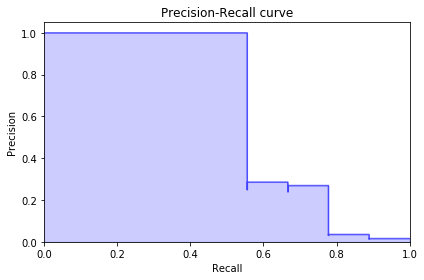

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       897
           1       1.00      0.56      0.71         9

    accuracy                           1.00       906
   macro avg       1.00      0.78      0.86       906
weighted avg       1.00      1.00      0.99       906



In [11]:
classify(model, 'Logistic_Regression')

In [12]:
# from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(
#     n_estimators=50,
#     criterion='gini',
#     max_depth=5,
#     min_samples_split=2,
#     min_samples_leaf=1,
#     min_weight_fraction_leaf=0.0,
#     max_features='auto',
#     max_leaf_nodes=None,
#     min_impurity_decrease=0.0,
#     min_impurity_split=None,
#     bootstrap=True,
#     oob_score=False,
#     n_jobs=-1,
#     random_state=0,
#     verbose=0,
#     warm_start=False,
#     class_weight='balanced'
# )

In [13]:
# https://github.com/seanconeys/Bitcoin_Ponzi_ml/blob/master/%5BFinal%5D%20Blockcheck%20-%20ML%20Fraud%20Detection.ipynb
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV

def modelTune(model, param_grid, X_train, y_train, scoring = 'recall'):
    
    #model tune tests for the best model given a set of parameters and scoring metric
    best_model = GridSearchCV(model, param_grid, scoring = scoring, cv = 3, n_jobs = -1)
    best_model.fit(X_train, y_train)
    
    return best_model.best_estimator_

def cross_validate(model, modelname, params, X, y, sampler=None):
    sss = StratifiedShuffleSplit(n_splits=3, test_size=0.2, random_state=0) #we initialize our SSS object
    
    #lists to keep track of scoring
    precision_scores = []
    recall_scores = []
    auc_scores = []
    
    for train_index, test_index in sss.split(X, y):
        #using indices for each split we generate a new test and train set
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #for each new train/test set, we resample
#         X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)
        if sampler == None:
            X_train_res, y_train_res = X_train, y_train
        else:
            X_train_res, y_train_res = sampler.fit_resample(X_train, y_train)
        #finally we retreive the best model for recall
        best_model = modelTune(model, params, X_train_res, y_train_res, scoring = 'roc_auc')
        y_pred = best_model.predict(X_test)

        precision_scores.append(precision_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        auc_scores.append(average_precision_score(y_test,y_pred))

#     print('-------' + modelname + " w/ " + samplername + '--------')
    print('Model: ', best_model)
    print("Recall: {}".format(np.mean(recall_scores)))
    print("Precision: {}".format(np.mean(precision_scores)))
    print("AUC: {}".format(np.mean(auc_scores)))
    print('\n')

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
params = {
                "criterion": ["gini", "entropy"], 
                "max_depth": list(range(2,4,1)), 
                "min_samples_leaf": list(range(5,7,1)),
                "n_estimators": list(range(100, 500, 100))
               }



c = cross_validate(model,"RF",params, X.values, y.values)

Model:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)
Recall: 0.2222222222222222
Precision: 1.0
AUC: 0.22994849153789554




In [15]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=2)
params = {
                "criterion": ["gini", "entropy"], 
                "max_depth": list(range(2,4,1)), 
                "min_samples_leaf": list(range(5,7,1)),
                "n_estimators": list(range(100, 500, 100))
               }



c = cross_validate(model,"RF",params, X.values, y.values)

KeyboardInterrupt: 

In [16]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


smote = SMOTE(random_state=2)
under_sampler = RandomUnderSampler(random_state=101)

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

In [17]:
model = RandomForestClassifier(random_state=2)
params = {
                "criterion": ["gini", "entropy"], 
                "max_depth": list(range(2,4,1)), 
                "min_samples_leaf": list(range(5,7,1)),
                "n_estimators": list(range(100, 500, 100))
               }



c = cross_validate(model,"RF",params, X.values, y.values, sampler=smote)

Model:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)
Recall: 0.9444444444444445
Precision: 0.2516390614216701
AUC: 0.240616863727287




In [18]:
model = RandomForestClassifier(random_state=2)
params = {
                "criterion": ["gini", "entropy"], 
                "max_depth": list(range(2,4,1)), 
                "min_samples_leaf": list(range(5,7,1)),
                "n_estimators": list(range(100, 500, 100))
               }



c = cross_validate(model,"RF",params, X.values, y.values, sampler=under_sampler)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Model:  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)
Recall: 0.9444444444444445
Precision: 0.09432499634342546
AUC: 0.08932131716756087




/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
